# 聚类算法

<p style='color:red'>使用不同的聚类准则，产生的聚类结果不同。</p>

## 聚类算法简介

### 聚类算法在现实中的应用

* 用户画像，广告推荐，Data Segmentation(数据分割)
* 基于位置信息的商业推送
* 图像分割，将为，识别；离群点检测，信用卡异常消费，发掘相同功能的基因片段

### 聚类算法的概念

**聚类算法：**

一种典型的**无监督学习**算法，主要用于将相似的样本自动归到一个类别中。

在聚类算法中根据样本之间的相似性，将样本划分到不同的类别中，对于不同的相似度计算方法，会得到不同的聚类结果，常用的相似度计算方法有欧氏距离法。

**聚类算法和分类算法最大的区别：** 聚类算法是无监督的学习算法，而分类算法属于监督的学习算法。

## 聚类算法api初步使用

`sklearn.cluster.KMeans(n_clusters=8)`

* **参数：** n_clusters:开始的聚类中心数量
* **方法：** `estimator.fit(x)`、`estimator.predict(x)`、`estimator.fit_predict(x)`


### 案例

随机创建不同二维数据集作为训练集。并结合k-means算法将其聚类，你可以尝试分别聚类不同数量的簇，并观察聚类效果：

#### 创建数据集

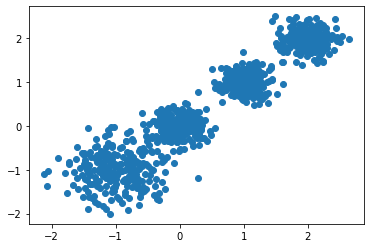

In [8]:
import matplotlib.pyplot as plt
# from sklearn.datasets._sample_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 创建数据集
# X为样本特征，y为样本类别，每个样本4个特诊，共4个簇
# 簇中心在[-1,-1],[0,0],[1,1],[2,2],簇方差分别为[0.4,0.2,0.2,0.2]
X,y=make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],
               cluster_std=[0.4,0.2,0.2,0.2],
               random_state=9)
# 数据可视化
plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

#### 使用k-means进行聚类，并用CH方法评估

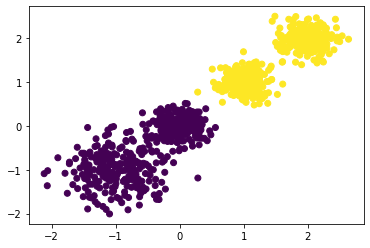

3116.1706763322227


In [9]:
y_pred=KMeans(n_clusters=2,random_state=9).fit_predict(X)
# 尝试n_cluster=2，然后查看聚类效果
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

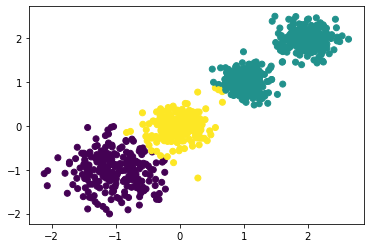

2931.6250301995556


In [21]:
y_pred=KMeans(n_clusters=3,random_state=9).fit_predict(X)
# 尝试n_cluster=3，然后查看聚类效果
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

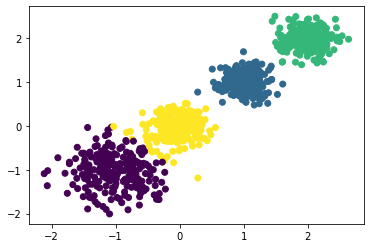

5924.050613480169


In [22]:
y_pred=KMeans(n_clusters=4,random_state=9).fit_predict(X)
# 尝试n_cluster=4，然后查看聚类效果
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

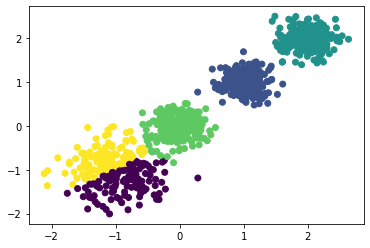

5403.631119994681


In [23]:
y_pred=KMeans(n_clusters=5,random_state=9).fit_predict(X)
# 尝试n_cluster=5，然后查看聚类效果
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

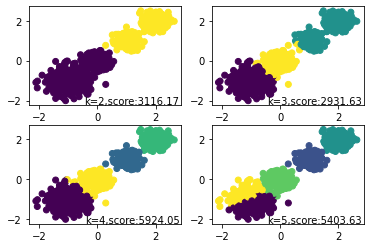

In [20]:
# 尝试n_cluster=2、3、4、5，然后查看聚类效果
for index,k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred=KMeans(n_clusters=k,random_state=9).fit_predict(X)
    score=calinski_harabasz_score(X,y_pred)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(.99,.01,('k=%d,score:%.2f'%(k,score)),
            transform=plt.gca().transAxes,size=10,
            horizontalalignment='right')
# 显示图像
plt.show()

四个图里面，k=4时，score最大，聚类效果最好。

## 聚类算法实现流程

k-means其实包含两层内容：

* k：初始中心点个数（计划聚类数）

* means：求中心带你到其他数据点距离的平均值

### k-means聚类步骤

1、随机设置K个特征空间内的点作为初始的聚类中心

2、对于其他每个点计算到K个中心的距离，未知的点选择最近的一个聚类中心点作为标记类别

3、接着对着标记的聚类中心之后，重新计算出每个聚类的新中心点(平均值)

4、如果计算得出的新中心点与原中心点一样(质心不再移动)，那么结束,否则重新进行第二步过程

### 案例

将下列数据点用k-means方法进行聚类

| |X值|Y值|
|  ----  | ----  |    ----  | 
|P1	|7	|7|
|P2	|2	|3|
|P3	|6	|8|
|P4	|1	|4|
|P5	|1	|2|
|P6	|3	|1|
|P7	|8	|8|
|P8	|9	|10|
|P9	|10	|7|
|P10|5	|5|
|P11|7	|6|
|P12|9	|3|
|P13|2	|8|
|P14|5	|11|
|P15|5	|2|

1、 选取中心点（P1、P2），k=2

通过距离公式算出数据点到中心点P1、P2的距离分别是

| |P1(7,7)|P2(2,3)|
|  ----  | ----  | ----  | 
|P3|	1.41	|6.40|
|P4|	6.71	|1.41|
|P5	|7.81	|1.41|
|P6	|7.21|	2.24|
|P7	|1.41|	7.81|
|P8	|3.61|	9.9|
|P9	|3	|8.94|
|P10	|2.83|	3.61|
|P11|	1	|5.83|
|P12	|4.47	|7.00|
|P13	|5.10	|5.00|
|P14	|4.47	|8.54|
|P15	|5.39|3.16|
		
2、 迭代

$P_x=\frac{\sum^n_{i=1}P_{i_x}}{n}$$P_y=\frac{\sum^n_{i=1}P_{i_y}}{n}$

得到新的质心

$P_1^{'}=(\frac{6+8+9+10+5+7+9+5}{8},\frac{8+8+10+7+5+6+3+11}{8})=(7.4,7.3)$

$P_2{'}=(2.3,3.3)$

新一轮迭代（iteration）

| |P1'(7.4,7.3)|P2'(2.3,3.3)|
|  ----  | ----  |    ----  | 
|P1|||	
|P2|||
|P3|||
|P4|||	
|P5|||
|P6|||
|P7|||	
|P8|||
|P9|||
|P10|||
|P11|||	
|P12|||
|P13|||
|P14|||	
......

点的队列和上一轮无差别的时候，平均值means不变，质心不再变化（收敛了）

当每次迭代结果不变时，认为算法收敛，聚类完成。

**流程**:

* 事先确定常数k，常数k意味着最终的聚类类别数，

* 首先随机选定初始点为质心，并通过计算每一个样本与质心之间的相似度(这里为欧式距离)，将样本点归到最相似的类中，

* 接着重新计算每个类的质心(即为类中心)，重复这样的过程，直到质心不再改变，

* 最终就确定了每个样本所属的类别以及每个类的质心。

**注意：**

由于每次都要计算所有的样本与每一个质心之间的相似度，故在大规模的数据集上，K-Means算法的收敛速度比较慢。

## 模型评估

### 误差平方和SSE
* the sum of squares due to error

* error=真实值与预测值之差

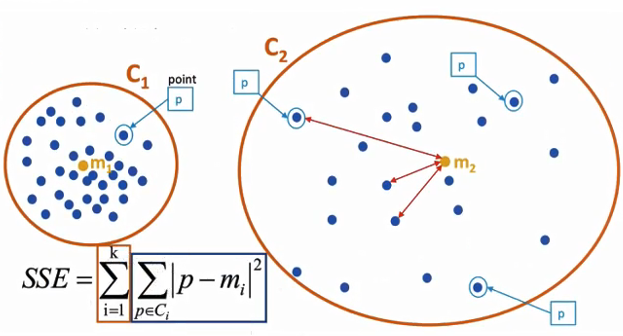

上图中，k=2

SSE的最终结果，对图松散度的衡量，在上图，如果分开看，左边SSE小，更紧密。

<p style="color:'red'">SSE越小，效果越好</p>

随着聚类迭代，SSE会越来越小，最后趋于稳定。

如果质心的初始值选择不好，SSE只会达到一个不怎么好的局部最优解。

### 肘方法（Elbow method）-K值确定

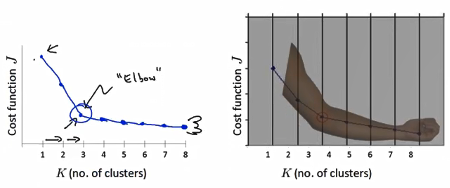

(1)对于n个点的数据集，迭代计算k from 1 to n，每次聚类完成后计算每个点到其所属的簇中心的距离的平方和;

(2)平方和是会逐渐变小的，直到k==n时平方和为0，因为每个点都是它所在的簇中心本身。

(3)在这个平方和变化过程中，会出现一个拐点也即"肘""点，**下降率突然变缓时即认为是最佳的k值**。
在决定什么时候停止训练时，肘形判据同样有效，数据通常有更多的噪音，**在增加分类无法带来更多回报时，我们停止增加类别**。

### 轮廓系数法（Silhouette Coefficient）

<p style='color:green'>SC系数效果衡量</p>

结合了聚类的凝聚度(Cohesion)和分离度(Separation),用于评估聚类的效果:

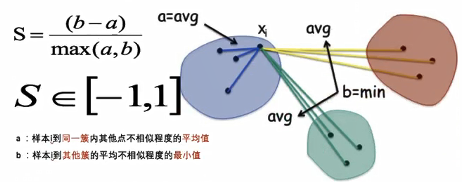

`S=-1`时，效果最差，`S=1`时，效果最好

**目的:** 内部距离最小化，外部距离最大化 （a小，b大）

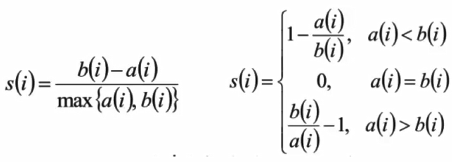

下图是500个样本含有2个feature的数据分布情况，我们对它进行SC系数效果衡量:

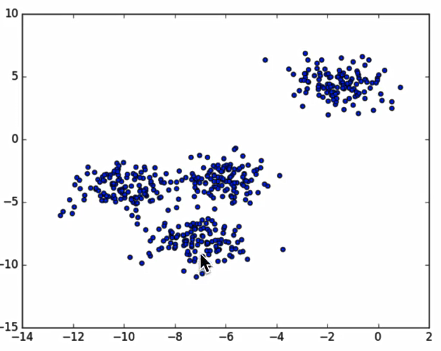

n_clusters = 2 The average silhouette_score is : 0.7049787496083262

n_clusters = 3 The average silhouette_score is : 0.5882004012129721

n_clusters = 4 The average silhouette_score is : 0.6505186632729437

n_clusters = 5 The average silhouette_score is : 0.56376469026194

n_clusters = 6 The average silhouette_score is : 0.4504666294372765

虽然k=2时score更大，但是因为2组的样本数量相差太大，所以还是k=4更合适。


### CH系数（Calinski-Harabasz Index）

**Calinski-Harabasz：**

类别内部数据的协方差越小越好，类别之间的协方差越大越好（换句话说:类别内部数据的距离平方和越小越好。类别之间的距离平方和越大越好)

这样的Calinski-Harabasz分数s会高，**分数s高则聚类效果越好**。

$$S(k)=\frac{tr(B_k)}{tr(W_k)}\frac{m-k}{k-1}$$

$tr$为矩阵的迹，$B_k$为类别之间的协方差矩阵，$W_k$为类别内部数据的协方差矩阵，$m$为训练集样本数，$k$为类别数。

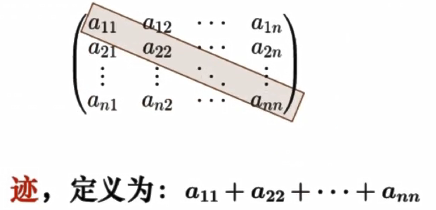

**使用矩阵的迹进行求解的理解︰**

矩阵的对角线可以表示一个物体的相似性

在机器学习里，主要为了获取数据的特征值，那么就是说，在任何一个矩阵计算出来之后，都可以简单化，只要获取矩阵的迹，就可以表示这一块数据的最重要的特征了，这样就可以把很多无关紧要的数据删除掉,达到简化数据，提高处理速度。

**CH需要达到的目的:** 用尽量少的类别聚类尽量多的样本，同时获得较好的聚类效果

## 算法优化

**k-means算法小结**

优点:

1. 原理简单(靠近中心点)，实现容易
2. 聚类效果中上(依赖K的选择}
3. 空间复杂度o(N)，时间复杂度o(IKN)
`N为样本点个数。K为中心点个数，I为迭代次数`

缺点:
1. 对离群点，噪声敏感(中心点易偏移)
2. 很难发现大小差别很大的簇及进行增量计算
3. 结果不一定是全局最优，只能保证局部最优(与K的个数及初值选取有关)

### Canopy算法

#### Canopy聚类过程

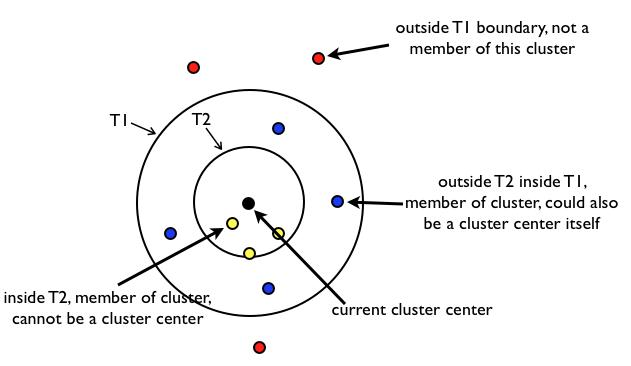

```
while D is not empty
      select element d from D to initialize canopy c
      remove d from D
      Loop through remaining elements in D
           if distance between d_i and c < T1 : add element to the canopy c
           if distance between d_i and c < T2 : remove element from D
      end
      add canopy c to the list of canopies C
end
```

#### Canopy算法的优缺点

优点:
1. Kmeans对噪声抗干扰较弱，通过Canopy对比，将较小的NumPoint的Cluster直接去掉有利于抗干扰。
2. Canopy选择出来的每个Canopy的centerPoint作为K会更精确。
3. 只是针对每个Canopy的内做Kmeans聚类，减少相似计呼的数量。

缺点:
1. 算法中T1、T2的确定问题,依旧可能落入局部最优解


### K-means++

$$P=\frac{D(x)^2}{{\sum}_{x∈X}D(x)^2}$$

kmeans++目的，**让选择的质心尽可能的分散**

如下图中，如果第一个质心选择在圆心，那么最优可能选择到的下一个点在P(A)这个区域〈根据颜色进行划分)

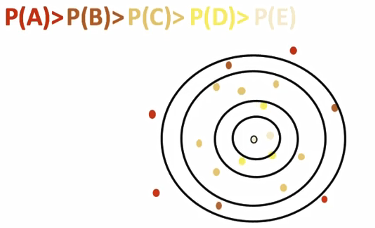

K-Means++算法是K-Means算法的改进版，主要是为了选择出更优的初始聚类中心。其基本思路如下：
* 在数据集中随机选择一个样本作为第一个初始聚类中心；
* 选择出其余的聚类中心：
  * 计算数据集中的每一个样本与已经初始化的聚类中心之间的距离，选择其中最短的距离，记为$d_i$；
  * 以概率选择距离最大的样本作为新的聚类中心，重复上述过程，直到$k$个聚类中心都被确定。
* 对$k$个初始的聚类中心，利用K-Means算法计算出最终的聚类中心。

### 二分k-means

**实现流程：**
1. 所有点作为一个簇
2. 将该簇一分为二
3. 选择能最大限席降低聚类代价函数(也就是误差平方和)的簇划分为两个簇
4. 以此进行下去,直到簇的数目等于用户给定的数目k为止

(即再次划分为较松散的簇)

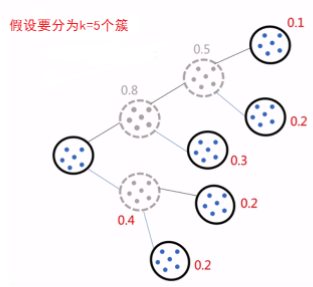

**隐含的一个原则**

因为聚类的误差平方和能够衡量聚类性能，该值越小表示数据点越接近于他们的质心，聚类效果就越好。所以需要对误差平方和最大的簇进行再一次划分，因为误差平方和越大，表示该簇聚类效果越不好，越有可能是多个簇被当成了一个簇，所以我们首先需要对这个簇进行划分。

二分K均值算法可以加速K-means算法的执行速度，因为它的相似度计算少了并且不受初始化问题的影响,因为这里不存在随机点的选取，且每一步都保证了误差最小。


* <p style='color:gray'>k_means：简单，容易理解，但特别容易陷入局部最优解</p>
* <p style='color:gray'>Canopy：通过绘制同心圆，进行k值选择筛选，但需要确定同心圆半径 $t1$、$t2$</p>
* <p style='color:gray'>k_means++：距离平方进行求解，保证下一个质心到当前质心距离最远</p>
* <p style='color:gray'>二分k_means：通过误差平方和，设置阈值，然后进行划分</p>

### k-medoids（k-中心聚类算法）

K-medoids和K-means是有区别的，**不一样的地方在于中心点的选取**

* K-means中，将中心点取为当前cluster中所有数据点的平均值，对异常点很敏感!
* K-medoids中，将从当前cluster中选取到其他所有〔当前cluster中的)点的距离之和最小的点作为中心点。


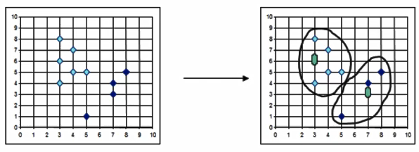

**算法流程:**
1. 总体 $n$个样本点中任意选取k个点作为medoids
2. 按照与medoids最近的原则，将剩余的$n-k$个点分配到当前最佳的medoids代表的类中
3. 对于第 $i$个类中除对应medoids点外的所有其他点，按顺序计算当其为新的medoids时，代价函数的值，近历所有可能，选取代价函数最小时对应的点作为新的medoids
4. 重复2-3的过程，直到所有的medoids点不再发生变化或已达到设定的最大迭代次数
5. 产出最终确定的 $k$个类

**k-medoids对噪声鲁棒性好。**

**例:** 当一个cluster样本点只有少数几个，如(1,1)(1.,2)(2.1)(1000,1000)。其中(1000,1000)是噪声。如果按照k-means质心大致会处在（1,1)(1000,1000)中间，这显然不是我们想要的。这时k-medoids就可以避免这种情况，他会在(1,1)(1.2)(2.1)(1000,1000)中选出一个样本点使cluster的绝对误差最小,计算可知一定会在前三个点中选取。

k-medoids只能对**小样本**起作用，样本大，速度就太慢了，当样本多的时候，少数几个噪音对k-means的质心影响也没有想象中的那么重，所以k-means的应用明显比k-medoids多。

### Kernel k-means

kernel k-means实际上，就是将每个样本进行一个投射到高维空间的处理，然后再将处理后的数据使用普通的k-means算法思想进行聚类。


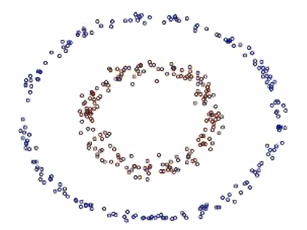

### ISODATA

类别数目随着聚类过程而变化;对类别数会进行合并，分裂。

“合并":(当聚类结果某一类中样本数太少。或两个类间的距离太近时)

“分裂”(当聚类结果某一类的类内方差太大，将该类进行分裂)


### MiniBAtch K-Means

`适合大数据的聚类算法`

大数据量是什么量级?通常当样本量大于1万做聚类时，就需要考虑选用Mini Batch K-Means算法。Mini Batch KMeans使用了Mini Batch(分批处理)的方法对数据点之间的距离进行计算。
Mini Batch计算过程中不必使用所有的数据样本，而是从不同类别的样本中抽取一部分样本来代表各自类型进行计算。由于计算样本量少，所以会相应的减少运行时间，但另一方面抽样也必然会带来准确度的下降。

该算法的迭代步骤有两步:
1. 从数据集中随机抽取一些数据形成小批量,把他们分配给最近的质心
2. **更新质心**
与Kmeans相比，鼓据的更新在每一个小的样本集上。对于每一个小批量，通过计算平均值得到更新质心，并把小批量里的数据分配给该质心，随着迭代次数的增加，这些质心的变化是逐渐减小的，直到质心稳定或者达到指定的迭代次数，停止计算。


|<center>优化方法</center>|<center>思路</center>|
|--|--|
|<p style='color:green'>Canopy+kmeans</p>|<p align='left'>Canopy粗聚类配合kmeans</p>|
|<p style='color:green'>kmeans++</p>|<p align='left'>距离越远越容易成为新的质心</p>|
|<p style='color:green'>二分kmeans</p>|<p align='left'>拆除SSE最大的簇</p>|
|<p style='color:green'>k-medoids</p>|<p align='left'>和kmeans选取中心点的方式不同</p>|
|<p style='color:green'>kernel kmeans</p>|<p align='left'>映射到高维空间</p>|
|<p style='color:green'>ISODATA</p>|<p align='left'>动态聚类</p>|
|<p style='color:green'>Mini-batch K-Means </p>|<p align='left'>大数据集分批聚类</p>|

## 特征降维

**降维**是指在某些限定条件下，降低随机变量(特征)个数，得到一组“不相关”主变量的过程。

降低随机变量的个数

`相关特征(correlated feature)`

正是因为在进行训练的时候，我们都是使用特征进行学习。如果特征本身存在问题或者特征之间相关性较强，对于算法学习预测会影响较大.

### 降维的两种方式

* 特征选择
* 主成分分析（可以理解为一种特征提取的方式）

### 特征选择

**特征选择：** 数据中包含冗余或无关变量(或称特征、属性、指标等)，旨在从原有特征中找出主要特征。

#### 两种方式

Filter(过滤式)：主要探究特征本身特点、特征与特征和目标值之间关联。
* 方差选择法：低方差特征过滤
* 相关系数

Embedded(嵌入式)：算法自动选择特征(特征与目标值之间的关联)
* 决策树：信息嫡、信息增益
* 正则化：L1、L2
* 深度学习：卷积等


#### 低方差特征过滤

删除低方差的一些特征，前面讲过方差的意义。再结合方差的大小来考虑这个方式的角度。
* 特征方差小：某个特征大多样本的值比较相近
* 特征方差大：某个特征很多样本的值都有差别


**API**

`sklearn.feature_selection.VarianceThreshold(threshold = 0.0)`

▹删除所有低方差特征

▹Variance.fit_transform(X)
* X：numpy array格式的数据[n_samples,n_features]
* 返回值：训练集差异低于threshold的特征将被删除。默认值是保留所有非零方差特征，即删除所有样本中具有相同值的特征。(所以，参数threshold一般要进行值的指定)


我们对某些股票的指标特征之间进行一个筛选，除去'index,'date','return'列不考虑（这些类型不匹配，也不是所需要指标）

一共这些特征：
```
pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense

```

分析

1、初始化VarianceThreshold，指定阀值方差

2、调用fit_transform

In [18]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

def var_thr():
    """
    特征选择：低方差特征过滤
    """
    data = pd.read_csv("factor_returns.csv")
    print(data)
    # 1、实例化一个转换器类
    transfer = VarianceThreshold(threshold=10)
    # 2、调用fit_transform
    trans_data = transfer.fit_transform(data.iloc[:, 1:10])
    print("之前数据的形状：\n",data.iloc[:,1:10].shape)
    print("之后数据的形状：\n",trans_data.shape)
    print("删除低方差特征的结果：\n", trans_data)
    pass

if __name__=='__main__':
    var_thr()

         index  pe_ratio  pb_ratio    market_cap  return_on_asset_net_profit  \
0  000001.XSHE    5.9572    1.1818  8.525255e+10                      0.8008   
1  000002.XSHE    7.0289    1.5880  8.411336e+10                      1.6463   
2  000008.XSHE -262.7461    7.0003  5.170455e+08                     -0.5678   
3  000060.XSHE   16.4760    3.7146  1.968046e+10                      5.6036   
4  000069.XSHE   12.5878    2.5616  4.172721e+10                      2.8729   

   du_return_on_equity            ev  earnings_per_share       revenue  \
0              14.9403  1.211445e+12               2.010  2.070140e+10   
1               7.8656  3.002521e+11               0.326  2.930837e+10   
2              -0.5943  7.705178e+08              -0.006  1.167983e+07   
3              14.6170  2.800916e+10               0.350  9.189387e+09   
4              10.9097  8.124738e+10               0.271  8.951453e+09   

   total_expense        date    return  
0   1.088254e+10  2012-01-31  0.0

#### 相关系数

主要实现方式：
* 皮尔逊相关系数
* 斯皮尔曼相关系数

斯皮尔曼相关系数比皮尔逊相关系数应用更加广泛

**皮尔逊相关系数**

1. 作用

反映变量之间相关关系密切程度的统计指标

2. 公式
$$r=\frac{n\sum{xy}-\sum{x}\sum{y}}{{\sqrt{n\sum{x^2}-(\sum{x})^2}}{\sqrt{n\sum{y^2}-(\sum{y})^2}}}$$

相关系数的值介于-1与+1之间,即-1≤r≤+1。其性质如下:
* 当r>0时,表示两非正相关，r<0时，两变量为负相关
* 当|r|=-1时，表示两变量为完全相关，当r=0时。表示两变量间无相关关系
* 当0<|r|<1时，表示两变量存在一定程度的相关。且|r|越接近1，两变量间线性关系越密切;|r|越接近于0，表示两变量的线性相关越弱
* 一般可按三级划分：|r|<0.4为低度相关;0.4<|r|<0.7为显著性相关;0.7<|r|<1为高度线性相关


**API**

`from scipy.ststs import pearsonr`
* x:(N,)array_like
* y:(N,)array_like Return:(Pearson's correlation coefficient,p-value)

In [20]:
# 皮尔逊相关系数演示
from scipy.stats import pearsonr
x1=[12.5,15.3,23.2,26.4,33.5,34.4,39.4,45.2,55.4,60.9]
x2=[21.2,23.9,32.9,34.1,42.5,43.2,49.0,52.8,59.4,63.5]
pearsonr(x1,x2)

(0.9941983762371884, 4.922089955456964e-09)

**斯皮尔曼相关系数**

1. 作用

反映变量之间相关关系密切程度的统计指标

2. 公式
$$RankIC=1-\frac{6\sum{d_i}^2}{n(n^2-1)}$$
n为等级个数，d为二列成对变量的等级差数

* 斯皮尔曼相关系数表明X(自变量)和Y(因变量)的相关方向。如果当X增加时，Y趋向于增加,斯皮尔曼相关系数则为正。
* 与之前的皮尔逊相关系数大小性质一样,取值[-1,1]之间

**API**

`from scipy.ststs import spearmanr`

In [22]:
# 斯皮尔曼相关系数演示
from scipy.stats import spearmanr
x1=[12.5,15.3,23.2,26.4,33.5,34.4,39.4,45.2,55.4,60.9]
x2=[21.2,23.9,32.9,34.1,42.5,43.2,49.0,52.8,59.4,63.5]
spearmanr(x1,x2)

SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)

#### 主成分分析（PCA）

* 定义:高维数据转化为低维数据的过程，在此过程中可能会舍弃原有数据、创造新的变量
* 作用:是数据维懿压缩，尽可能降低原数据的维数（复杂度)，损失少量信息。
* 应用:回归分析或者聚类分析当中

特征选择没有新数据产生，而主成分分析有新数据生成。

**API**

`sklearn.decomposition.PCA(n_ components=None)`
将数据分解为较低维数空间
n_components:
* 小数:表示保留百分之多少的信息
* 整数:减少到多少特征

PCA.fit_transform(X)  X:numpy array格式的数据[n_samples.n_features]

返回值:转换后指定维度的array


In [27]:
from sklearn.decomposition import PCA

def pca_demo():
    """
    对数据进行pca降维
    """
    data=[[2,8,4,5],[6,3,0,8],[5,4,9,1]]
    # 实例化pca，小数保留多少信息
    transfer=PCA(n_components=0.9)
    # 调用fit_transform
    data1=transfer.fit_transform(data)
    print("保留90%的信息，降维结果为：\n",data1)
    
    # 实例化pca，整数指定降维到的维数
    transfer2=PCA(n_components=3)
    # 调用fit_transform
    data2=transfer2.fit_transform(data)
    print("降维到三维的结果为：\n",data2)

pca_demo()

保留90%的信息，降维结果为：
 [[ 1.28620952e-15  3.82970843e+00]
 [ 5.74456265e+00 -1.91485422e+00]
 [-5.74456265e+00 -1.91485422e+00]]
降维到三维的结果为：
 [[ 1.28620952e-15  3.82970843e+00  5.26052119e-16]
 [ 5.74456265e+00 -1.91485422e+00  5.26052119e-16]
 [-5.74456265e+00 -1.91485422e+00  5.26052119e-16]]


## 案例：用户对物品类别喜好


**分析**
1. 获取数据

2. 数据基本处理。 
    - 2.1合并表格。 

    - 2.2交叉表合并。 

    - 2.3数据截取

3. 特征工程-pca
4. 机器学习(k-means)
5. 模型评估
`sklearn.metrics.silhouette_score(X, labels)`

    - 计算所有样本的平均轮廓系数

    - X：特征值

    - labels︰被聚类标记的目标值



In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# 获取数据
order_product=pd.read_csv("./instacart/order_products__prior.csv")
products=pd.read_csv("./instacart/products.csv")
orders=pd.read_csv("./instacart/orders.csv")
aisles=pd.read_csv("./instacart/aisles.csv")

In [6]:
# 数据基本处理
# 1. 合并表格
table1=pd.merge(order_product,products,on=["product_id","product_id"])
table2=pd.merge(table1,orders,on=["order_id","order_id"])
table =pd.merge(table2,aisles,on=["aisle_id","aisle_id"])
# 2. 交叉表合并
table=pd.crosstab(table["user_id"],table["aisle"])
# 3. 数据截取
table=table[:1000]
# 转换之前
table.shape #(1000, 134)

(1000, 134)

In [7]:
# 特征工程-pca
transfer=PCA(n_components=0.9)
# NameError: name 'pca' is not defined
# 注意PCA的大小写，写成小写的会报错
data=transfer.fit_transform(table)
# 转换之后
data.shape #(1000, 22)

(1000, 22)

In [12]:
# 机器学习 k-means
estimator = KMeans(n_clusters=5,random_state=22)
y_pre=estimator.fit_predict(data)

`SyntaxError: invalid character in identifier`

原因：**代码中含有中文字符**。使用jupyter编程时，中英文逗号极其相似，不易检查出来，可以根据逗号所占的宽度辨别，中文逗号间隔大，英文逗号间隔小

In [13]:
# 模型评估
silhouette_score(data,y_pre)

0.4455370019655099

<hr style="FILTER:alpha(opacity=100,finishopacity=0,style=3)" width="100%"color=#08D463; SIZE=1></hr>

本文作者：lfdx

写作日期：2022-10-15/16

本博客所有文章除特别声明外，均采用 **CC BY-NC-SA** 许可协议。转载请注明出处！

<hr style="FILTER:alpha(opacity=100,finishopacity=0,style=3)" width="100%"color=#08D463; SIZE=1></hr>